In [1]:
from IPython.display import YouTubeVideo

This document is a summary of what I have seen in Scipy 2016. It's freely adapted of the different presentation I have seen. The website of each libraries is given in the corresponding link section. Pleaser refer to these links for more information.

# Altair
[Altair](http://github.com/ellisonbg/altair/) provides a declarative Python API for statistical visualization, built on top of [Vega-Lite](http://vega.github.io/vega-lite/).

From the Vega-lite documentation:

> Vega-Lite specifications describe visualizations as mappings from data to properties of graphical marks (e.g., points or bars). It automatically produces visualization components including axes, legends, and scales. It then determines properties of these components based on a set of carefully designed rules. This approach allows Vega-Lite specifications to be succinct and expressive, but also provide user control. As Vega-Lite is designed for analysis, it supports data transformations such as aggregation, binning, filtering, sorting, and visual transformations including stacking and faceting.

The key feature of this declarative approach is that the user is free to think about the data, rather than the mechanics of the visualization. Vega-Lite specifications are expressed in JavaScript Object Notation (JSON), a cross-platform format often used for storage of nested and/or hierarchical data. Altair builds a Python layer on top of this, so that rather than writing raw JSON strings the user can write declarative Python code.

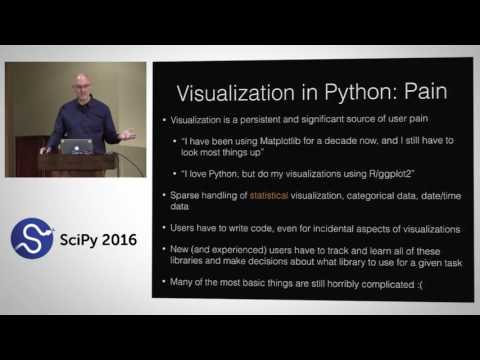

In [2]:
YouTubeVideo('v5mrwq7yJc4')

### Have a look
You can install altair with pip :
```bash
pip install altair
```

To download the Altair documentation as a set of Jupyter Notebooks that you can run yourself, run the following Python code from a Jupyter Notebook:

```python
from altair import tutorial
tutorial()
```

To have a fast Overview you can have a look see :
- [Index.ipynb](./AltairTutorial/01-Index.ipynb)
- [Introduction](./AltairTutorial/02-Introduction.ipynb)
- [Cars Datasets](./AltairTutorial/09-CarsDataset.ipynb)
- [Iris PairGrid](./AltairTutorial/10-IrisPairgrid.ipynb)

### Link
https://github.com/ellisonbg/altair

# Loopy
[Loopy](https://documen.tician.de/loopy/) is a code generator for array-based code in the OpenCL/CUDA execution model. Here’s a very simple example of how to double the entries of a vector using loopy:


In [6]:
import numpy as np
import loopy as lp
import pyopencl as cl
import pyopencl.array

# setup
# -----
ctx = cl.create_some_context()
queue = cl.CommandQueue(ctx)

n = 15 * 10**6
a = cl.array.arange(queue, n, dtype=np.float32)

# create
# ------
knl = lp.make_kernel(
        "{ [i]: 0<=i<n }",
        "out[i] = 2*a[i]")

# transform
# ---------
knl = lp.split_iname(knl, "i", 128, outer_tag="g.0", inner_tag="l.0")

# execute
# -------
evt, (out,) = knl(queue, a=a)

ImportError: No module named 'loopy'

This example is included in the loopy distribution as examples/python/hello-loopy.py.

In [ ]:
# compilation
# -----------
cknl = lp.CompiledKernel(ctx, knl)

print(cknl.get_highlighted_code({"a": np.float32}))

```c
#define lid(N) ((int) get_local_id(N))
#define gid(N) ((int) get_group_id(N))

__kernel void __attribute__ ((reqd_work_group_size(128, 1, 1)))
  loopy_kernel(__global float *restrict out, __global float const *restrict a, int const n)
{

    if ((-1 + -128 * gid(0) + -1 * lid(0) + n) >= 0)
          out[lid(0) + gid(0) * 128] = 2.0f * a[lid(0) + gid(0) * 128];
}
```

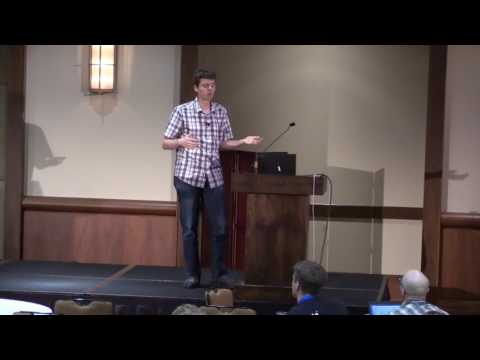

In [4]:
YouTubeVideo('Zz_6P5qAJck')

### Have a look
You can install loopy with pip:
```bash
pip install loo.py
```

### Link
https://documen.tician.de/loopy/

# JupyterLab

[JupyterLab](https://github.com/jupyter/jupyterlab) is an extensible computational environment for Jupyter.

**JupyterLab is a very early developer preview, and is not suitable for general usage yet. Features and implementation are subject to change.**

With JupyterLab, you can create a computational environment for Jupyter that meets your workflow needs.

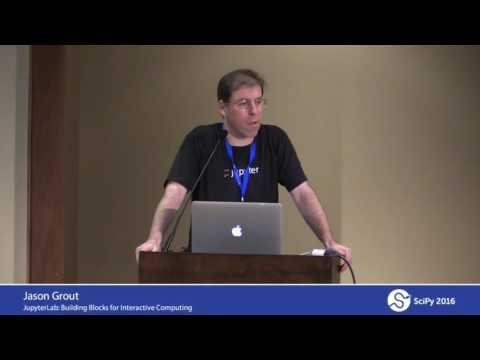

In [8]:
YouTubeVideo('Ejh0ftSjk6g')

### Let's have a look
**Prerequisite** Jupyter notebook version 4.2 or later. To check the notebook version: 
```bash 
jupyter notebook --version
```

**Installation** From the command line:
```bash
pip install jupyterlab
jupyter serverextension enable --py jupyterlab
```

Start up JupyterLab:
```bash
jupyter lab
```

### Links
https://github.com/jupyter/jupyterlab

## Numba
[Numba](http://numba.pydata.org/) gives you the power to speed up your applications with high performance functions written directly in Python. With a few annotations, array-oriented and math-heavy Python code can be just-in-time compiled to native machine instructions, similar in performance to C, C++ and Fortran, without having to switch languages or Python interpreters.

Numba works by generating optimized machine code using the LLVM compiler infrastructure at import time, runtime, or statically (using the included pycc tool). Numba supports compilation of Python to run on either CPU or GPU hardware, and is designed to integrate with the Python scientific software stack.

### Full tutorial
You can find a the scipy full tutorial of numba:
https://github.com/barbagroup/numba_tutorial_scipy2016

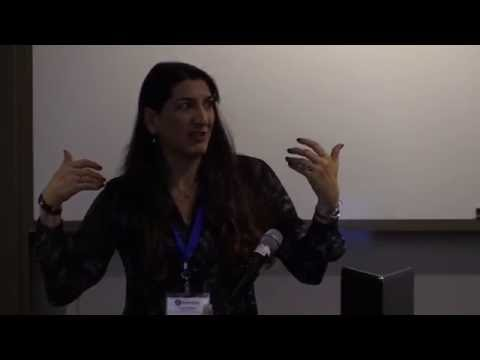

In [11]:
YouTubeVideo('SzBi3xdEF2Y')

### Let's have a look
You can install Numba from pip:
```
pip install numba
```
or from conda:
```
conda install numba
```

### Array sum

The function below is a naive `sum` function that sums all the elements of a given array.

In [ ]:
def sum_array(inp):
    J, I = inp.shape
    
    #this is a bad idea
    mysum = 0
    for j in range(J):
        for i in range(I):
            mysum += inp[j, i]
            
    return mysum

In [ ]:
import numpy
arr = numpy.random.random((300, 300))
sum_array(arr)

In [ ]:
plain = %timeit -o sum_array(arr)

### Let's jitted it as a function

In [ ]:
from numba import jit

In [ ]:
sum_array_numba = jit()(sum_array)

In [ ]:
jitted = %timeit -o sum_array_numba(arr)

In [ ]:
plain.best / jitted.best

### Let's jitted it as a function

In [ ]:
@jit
def sum_array(inp):
    I, J = inp.shape
    
    mysum = 0
    for i in range(I):
        for j in range(J):
            mysum += inp[i, j]
            
    return mysum

In [ ]:
sum_array(arr)

In [ ]:
%timeit sum_array(arr)

What about numpy ??

In [ ]:
%timeit arr.sum()

### When does `numba` compile things?

The first time you call the function.  

## HoloViews
[Holoviews](http://ioam.github.io/holoviews/) is a composable, declarative data structures for building even complex visualizations easily.

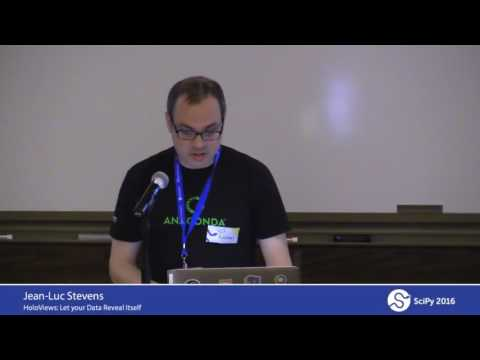

In [7]:
YouTubeVideo('0jhUivliNSo')

### Have a look
You can install loopy with pip:
```bash
pip install holoviews
```
or with conda:
```bash
conda install -c ioam holoviews
```
### Link
http://ioam.github.io/holoviews/

## Datashader
Datashader is a graphics pipeline system for creating meaningful representations of large amounts of data.
https://github.com/bokeh/datashader

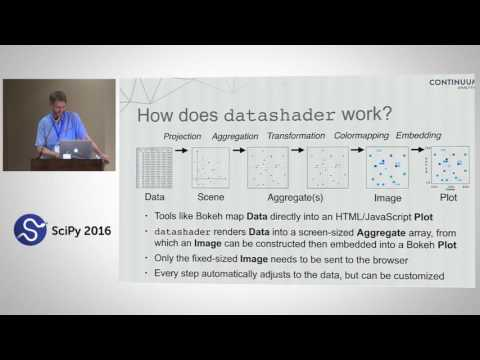

In [12]:
YouTubeVideo('6m3CFbKmK_c')

### Have a look
You can install loopy with conda:
```bash
conda install -c bokeh datashader
```
An example of Bokeh :
- [NYC Taxi Analysis](datashader/examples/nyc_taxi.ipynb)

### Link
http://ioam.github.io/holoviews/

## Flexx
Being pure Python and cross platform, it should work (almost) anywhere where there’s Python and a browser.
http://flexx.readthedocs.io/en/stable/start.html

In [13]:
YouTubeVideo('https://www.youtube.com/watch?v=kIPL3N2Xk_c')

## Dask
[Dask](http://dask.pydata.org/en/latest/) is a flexible parallel computing library for analytics.

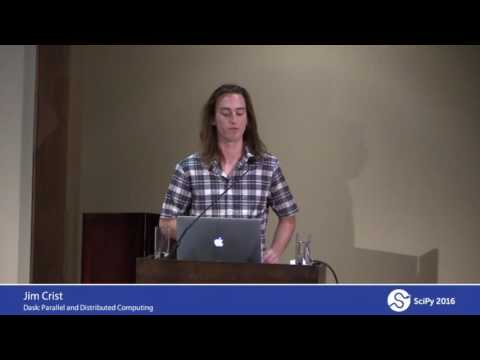

In [14]:
YouTubeVideo('PAGjm4BMKlk')

## Sympy
[SymPy](http://www.sympy.org/fr/index.html) is a Python library for symbolic mathematics. It aims to become a full-featured computer algebra system (CAS) while keeping the code as simple as possible in order to be comprehensible and easily extensible. SymPy is written entirely in Python.

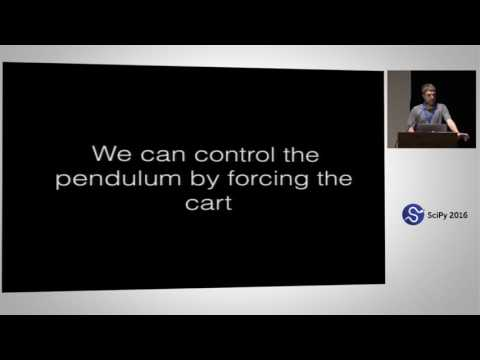

In [19]:
YouTubeVideo('nmI-cDAUjdE')

### Tutorial
https://github.com/sympy/scipy-2016-tutorial

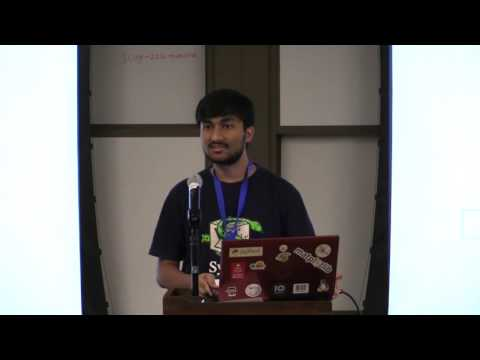

In [18]:
YouTubeVideo('AqnpuGbM6-Q')